# Temat testów - grafiki B: mapa vs tabela vs tekst vs wykres

SUMY:

– Czy istnieje istotna statystycznie różnica w sumie całkowitych długości fiksacji/wizyt między poszczególnymi formami prezentacji danych?
– Czy istnieje istotna statystycznie różnica w sumie średnich długości fiksacji/wizyt między poszczególnymi formami prezentacji danych?
– Czy istnieje istotna statystycznie różnica w sumie liczb fiksacji/wizyt między poszczególnymi formami prezentacji danych? 

POSZCZEGÓLNE DANE:

– Czy istnieje istotna statystycznie różnica w całkowitej długości fiksacji/wizyt między poszczególnymi formami prezentacji danych?
– Czy istnieje istotna statystycznie różnica w średniej długości fiksacji/wizyt między poszczególnymi formami prezentacji danych?
– Czy istnieje istotna statystycznie różnica w średniej wielkości źrenicy między poszczególnymi formami prezentacji danych?
– Czy istnieje istotna statystycznie różnica w liczbie fiksacji/wizyt między poszczególnymi formami prezentacji danych? 

ŚREDNIE:

– Czy istnieje istotna statystycznie różnica w średniej całkowitych długości fiksacji/wizyt między poszczególnymi formami prezentacji danych?
– Czy istnieje istotna statystycznie różnica w średniej średnich długości fiksacji/wizyt między poszczególnymi formami prezentacji danych?
– Czy istnieje istotna statystycznie różnica w średniej średnich wielkości źrenicy między poszczególnymi formami prezentacji danych?
– Czy istnieje istotna statystycznie różnica w średniej liczbie fiksacji/wizyt między poszczególnymi formami prezentacji danych?


In [1]:
import pandas as pd

from functions.tests.multivariate_analysis import anova
from functions.plots import plot_multi_boxplot, plot_multi_density
from functions.tests.posthoc import anova_posthoc

In [2]:
df = pd.read_csv('/Users/martasolarz/Studies/Thesis/Master_thesis/prepare_datasets/sets/map_tab_plt_txt.csv', index_col='idx')
df.sample(2)

,ID,Total_fix_1,Avg_fix_1,Num_fix_1,Avg_pupil_1,Total_visit_1,Avg_visit_1,Num_visit_1,Total_fix_2,Avg_fix_2,...,Avg_Total_visit,Sum_Avg_fix,Avg_Avg_fix,Sum_Avg_visit,Avg_Avg_visit,Sum_Num_fix,Avg_Num_fix,Sum_Num_visit,Avg_Num_visit,Avg_AvgPupil
idx,,,,,,,,,,,,,,,,,,,,,
0,46,4967,110.0,45,2.85607,23390,2339.0,10,14032,124.0,...,36581.5,339.0,169.5,12596.0,6298.0,204,102.0,22,11.0,2.812660
76,18,4881,148.0,33,3.40932,7230,3615.0,2,21646,165.0,...,23350.0,447.0,223.5,6651.0,3325.5,195,97.5,28,14.0,3.383723


In [3]:
ALPHA = 0.05

In [4]:
def test(data, columns, flag=True):
    for col in columns:
        print('#################################')
        print(col)
        if flag:
            data_copy = data.fillna(0)
        else:
            data_copy = data.copy()
        anova(data_copy, col, ['Group'], 'ID', ALPHA)
        
def plots(data, columns):
    for col in columns:
        plot_multi_density(data, col, 'Group', col, 'Grupa')
        plot_multi_boxplot(data, 'Group', col, 'Grupa', col)
        
def posthoc_tests(df, columns):
    for col in columns:
        print('#################################')
        print(col)
        anova_posthoc(df, col, 'Group', 'ID')

In [5]:
fixations = df.filter(regex='.*fix.*').columns
visits = df.filter(regex='.*visit.*').columns

In [6]:
# fiksacje
test(df, fixations)

#################################
Total_fix_1
       F Value  Num DF  Den DF    Pr > F
Group  4.78925     3.0   117.0  0.003489
-------------------
Zmienna: Group, P-value: 0.0034889053
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
#################################
Avg_fix_1
        F Value  Num DF  Den DF   Pr > F
Group  8.105871     3.0   117.0  0.00006
-------------------
Zmienna: Group, P-value: 0.0000596570
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
#################################
Num_fix_1
        F Value  Num DF  Den DF    Pr > F
Group  4.295674     3.0   117.0  0.006492
-------------------
Zmienna: Group, P-value: 0.0064918927
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
#################################
Total_fix_2
        F Value  Num DF  Den DF    Pr > F
Group  2.053489     3.0   117.0  0.110197
-------------------
Zmienna: Group, P-value: 0.1101974483
Brak podstaw do odrzucenia H0.
#################################
Avg_fix_

In [7]:
posthoc_tests(df, ['Total_fix_1', 'Avg_fix_1', 'Num_fix_1', 'Avg_fix_2', 'Avg_fix_3', 'Num_fix_3', 'Sum_Avg_fix', 'Avg_Avg_fix'])

#################################
Total_fix_1
-----------------------
Groups: mapa vs tabela
P-value: 0.28812222852449726
Brak podstaw do odrzucenia H0.
-----------------------
Groups: mapa vs tekst
P-value: 0.28812222852449726
Brak podstaw do odrzucenia H0.
-----------------------
Groups: mapa vs wykres
P-value: 0.3498980205881858
Brak podstaw do odrzucenia H0.
-----------------------
Groups: tabela vs tekst
P-value: 0.007859773637774481
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
-----------------------
Groups: tabela vs wykres
P-value: 0.47932551610735885
Brak podstaw do odrzucenia H0.
-----------------------
Groups: tekst vs wykres
P-value: 0.0009405142971321387
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
#################################
Avg_fix_1
-----------------------
Groups: mapa vs tabela
P-value: 0.1606753171356828
Brak podstaw do odrzucenia H0.
-----------------------
Groups: mapa vs tekst
P-value: 0.7935573164422152
Brak podstaw do odrzuce

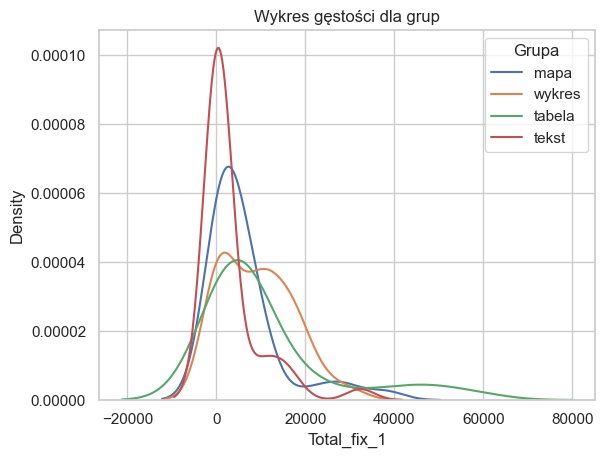

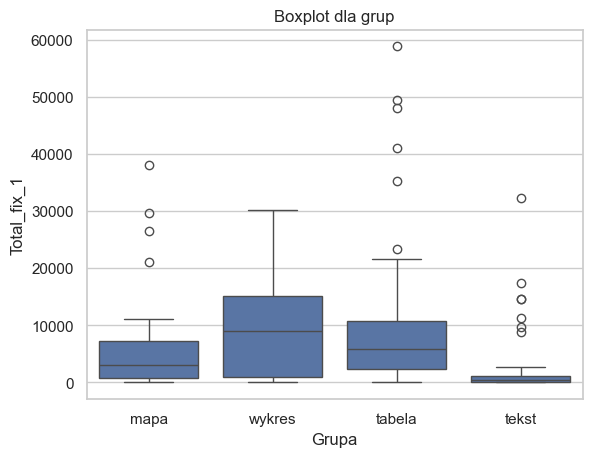

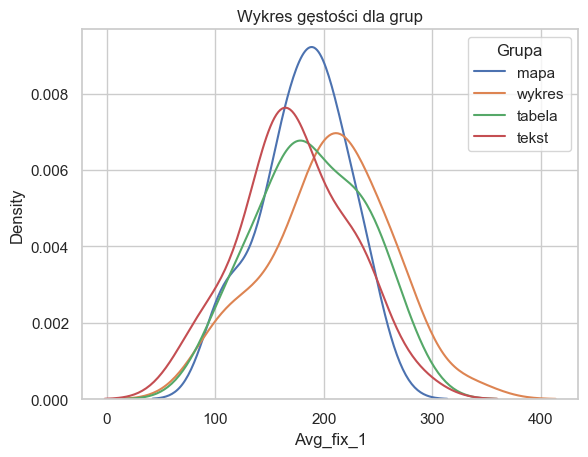

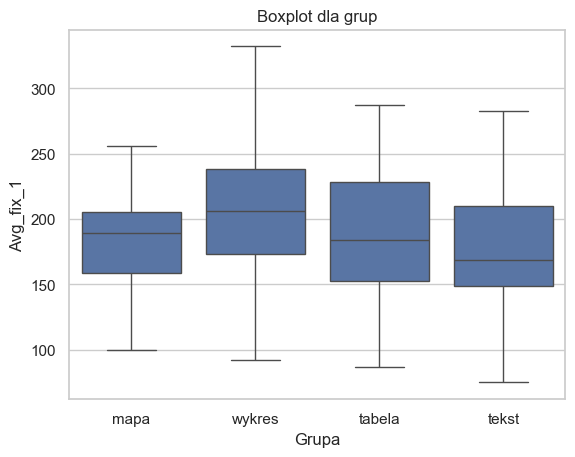

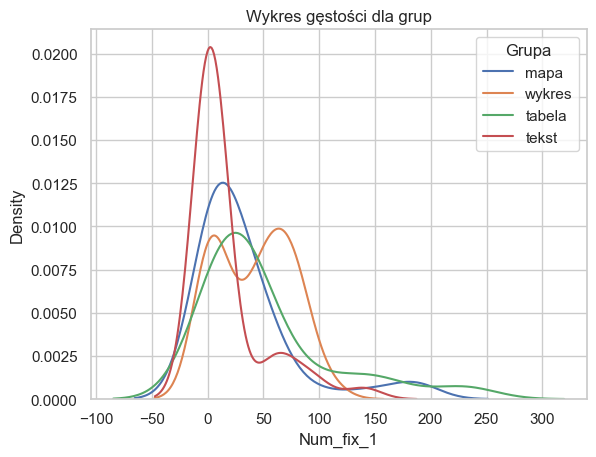

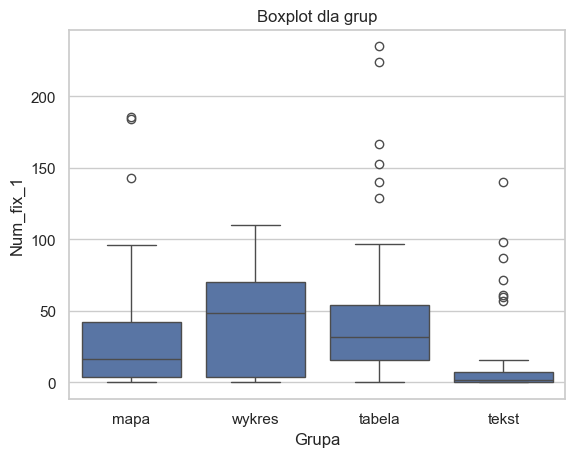

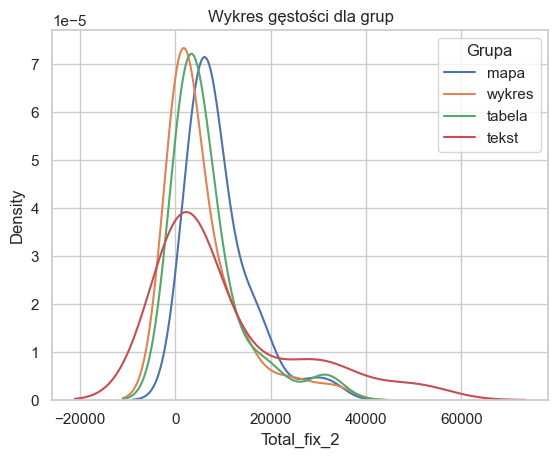

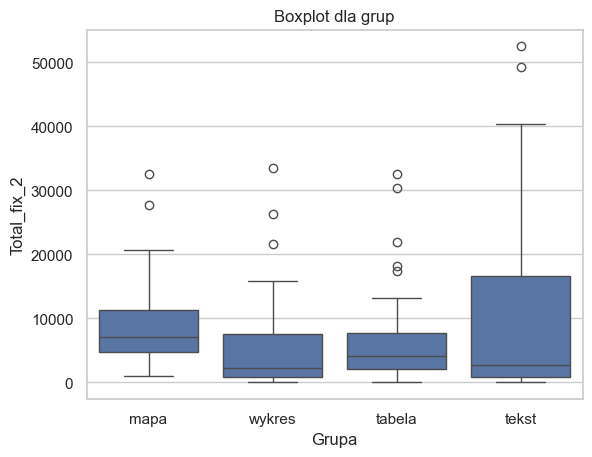

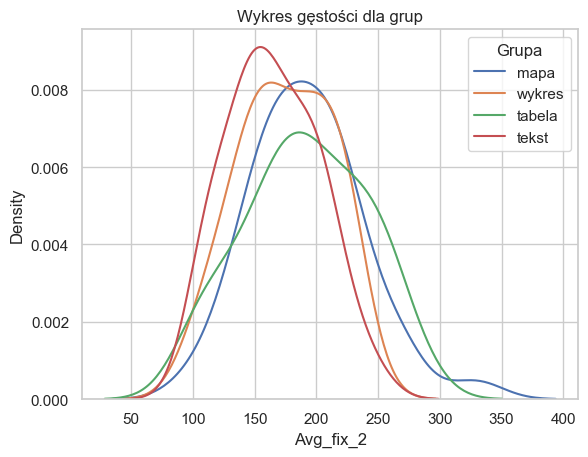

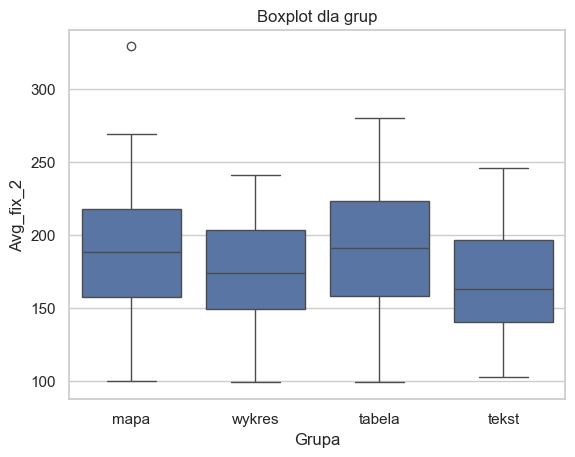

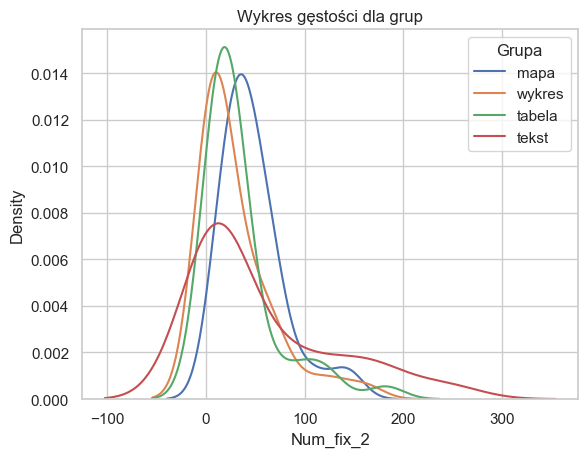

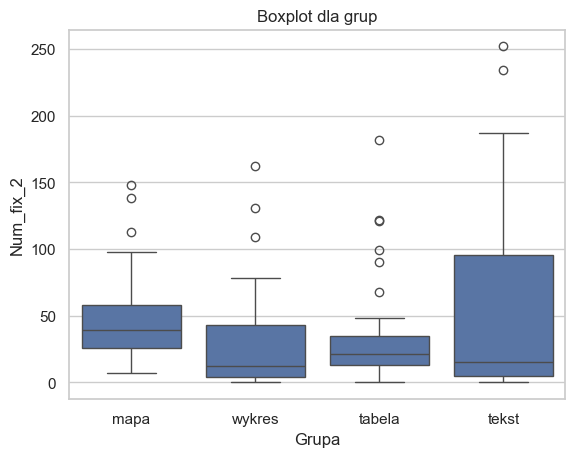

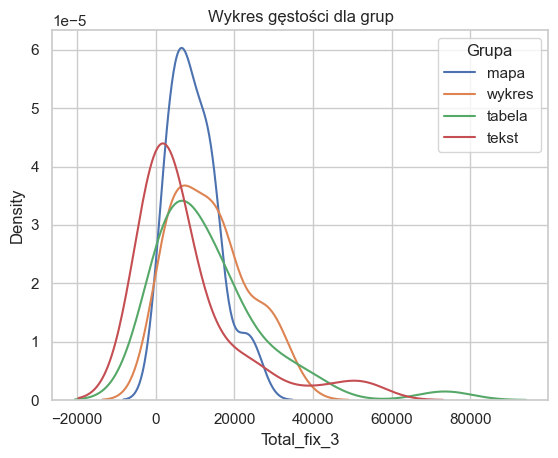

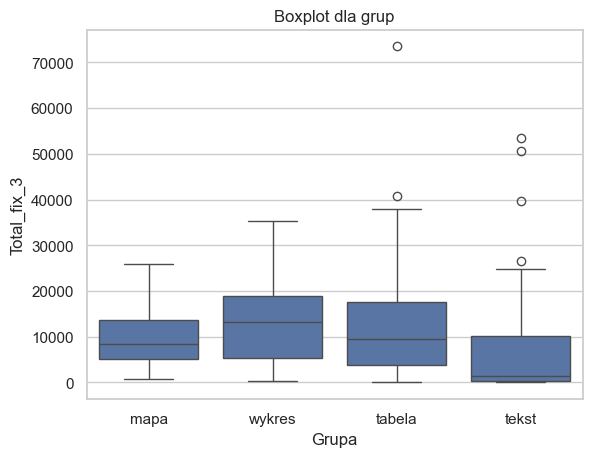

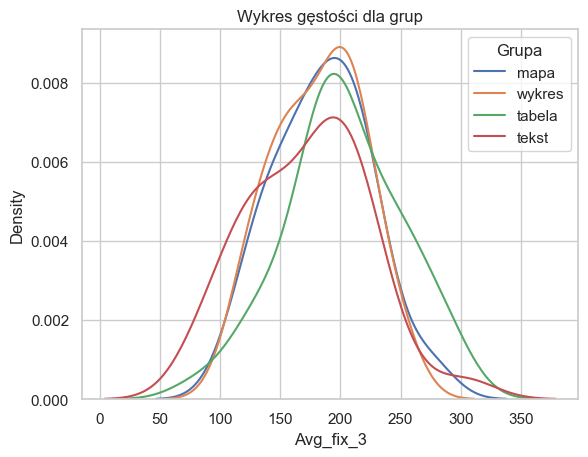

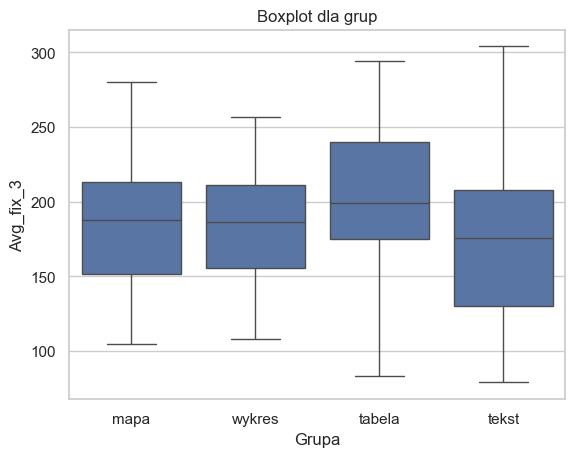

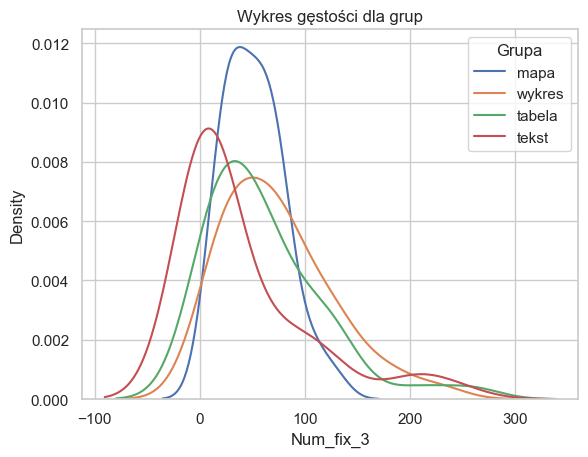

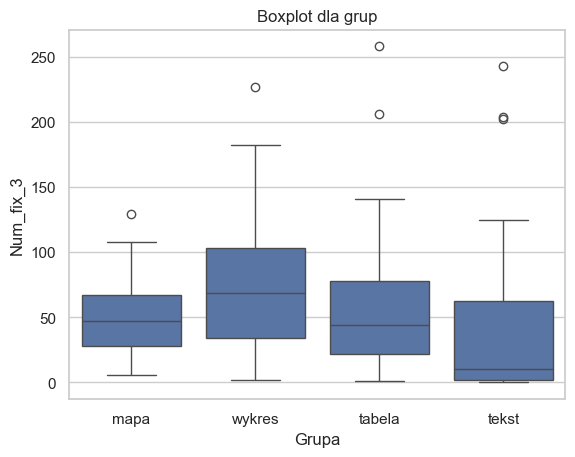

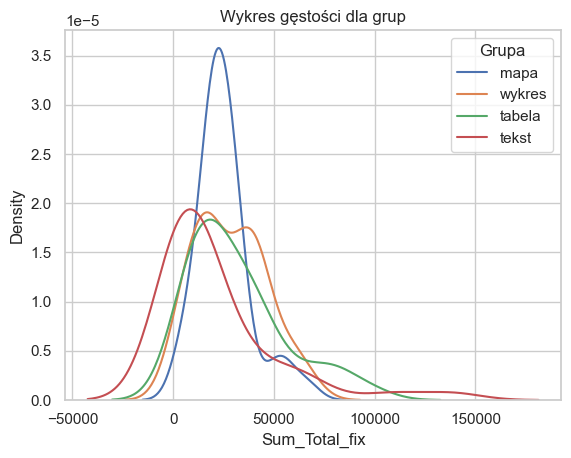

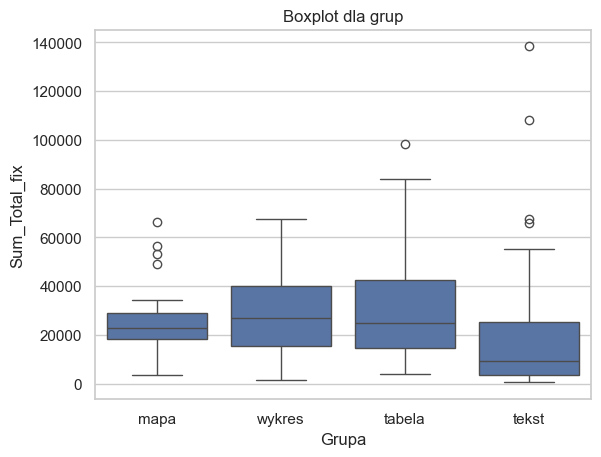

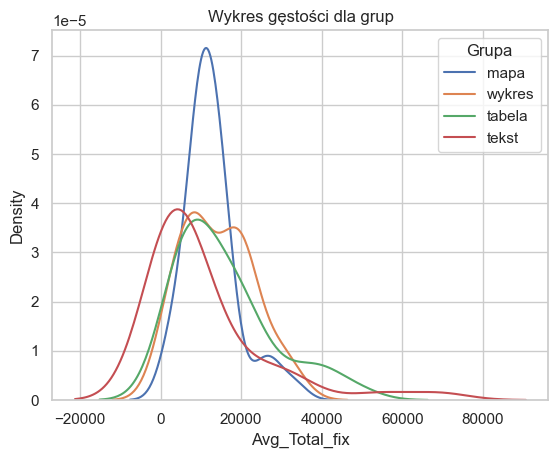

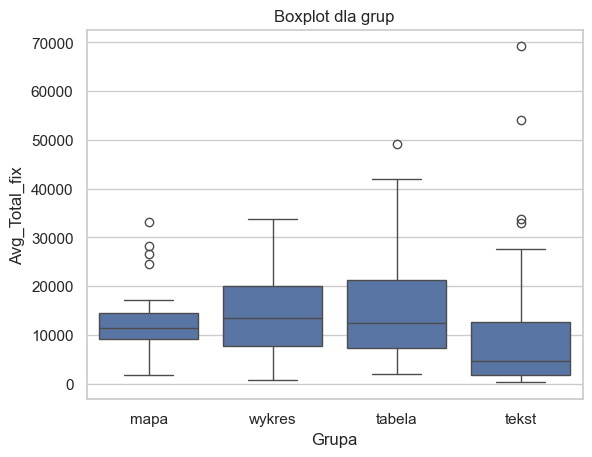

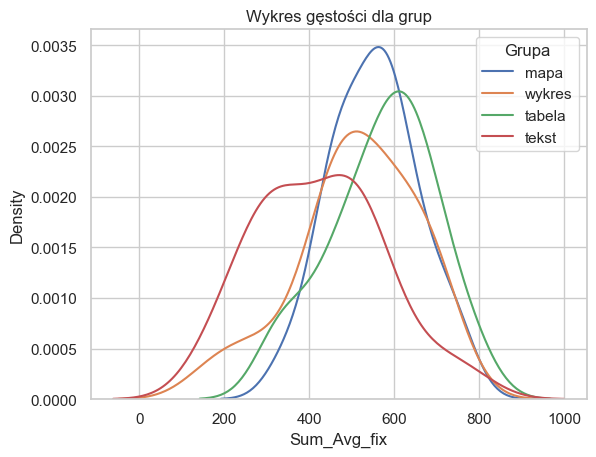

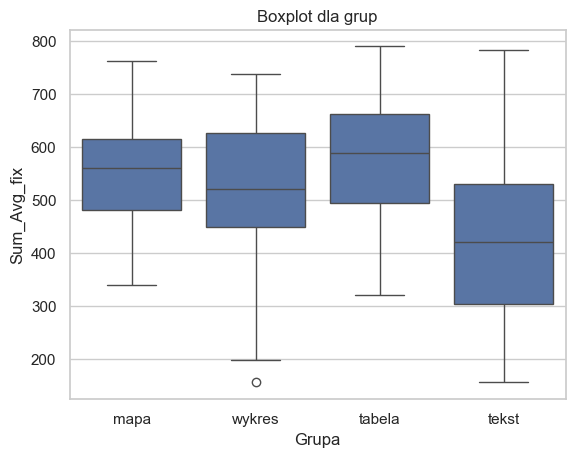

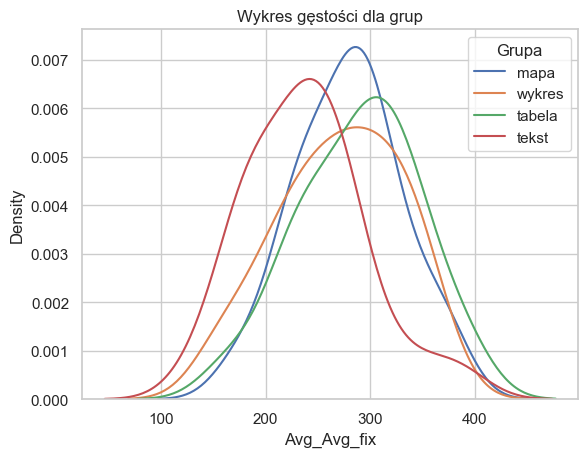

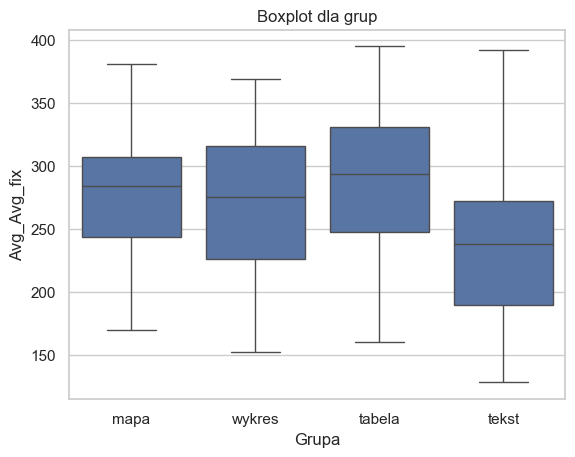

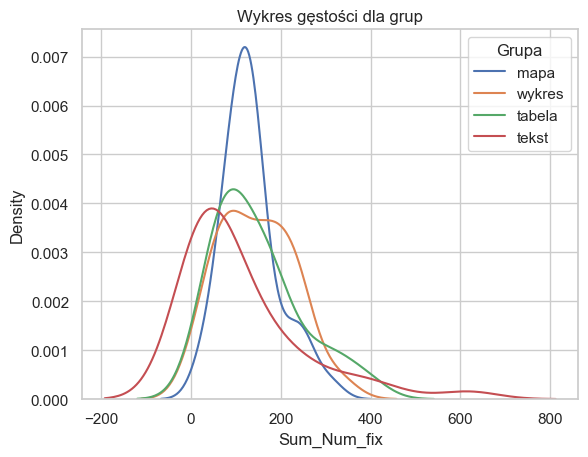

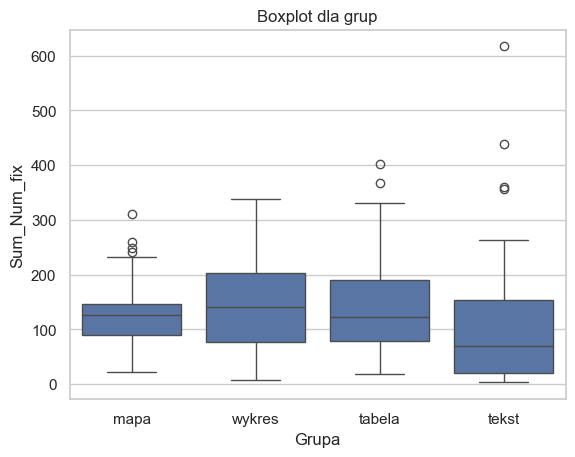

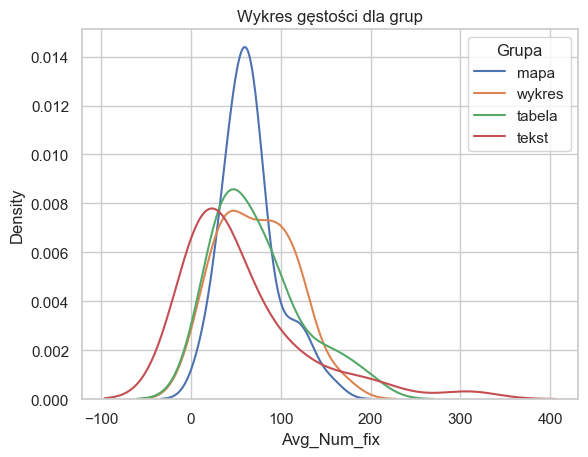

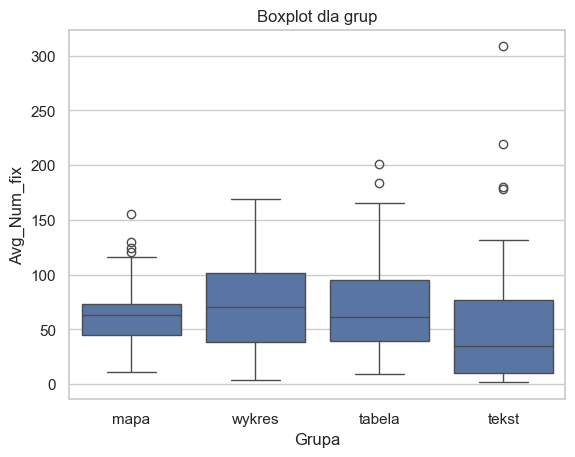

In [8]:
plots(df, fixations)

Podsumowanie:
Istotne statystycznie (fiksacje):

- Total_fix_1: tabela vs tekst, tekst vs wykres
- Avg_fix_1: słabo się różnicuje
- Num_fix_1: tabela vs tekst, tekst vs wykres
- Avg_fix_2: mapa vs tekst, tabela vs tekst
- Avg_fix_3: tabela vs tekst
- Num_fix_3: słabo się różnicuje
- Sum_Avg_fix: mapa vs tekst, tabela vs tekst, tabela vs wykres, tekst vs wykres
- Avg_Avg_fix: mapa vs tekst, tabela vs tekst, tabela vs wykres, tekst vs wykres

In [9]:
# średnia wielkość źrenicy
test(df, ['Avg_AvgPupil'], flag=False) # testujemy tylko średnią - inne nie mają znaczenia

#################################
Avg_AvgPupil
        F Value  Num DF  Den DF    Pr > F
Group  0.889447     3.0   117.0  0.448863
-------------------
Zmienna: Group, P-value: 0.4488632651
Brak podstaw do odrzucenia H0.


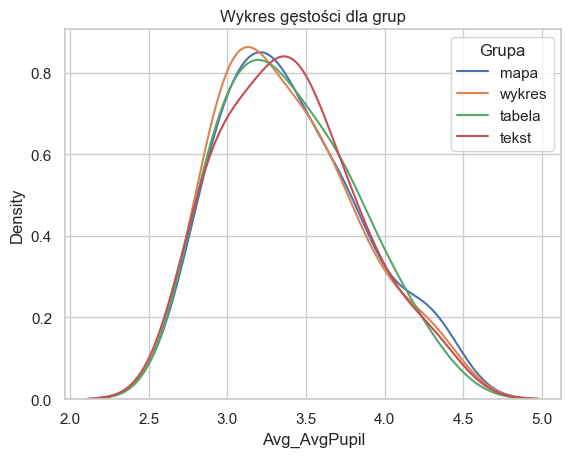

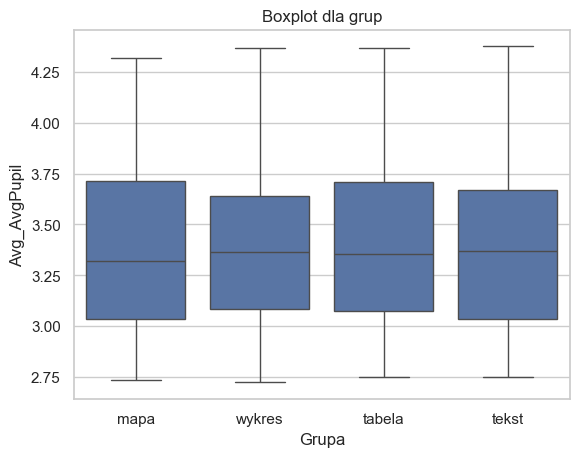

In [10]:
plots(df, ['Avg_AvgPupil'])

In [11]:
# wizyty
test(df, visits)

#################################
Total_visit_1
        F Value  Num DF  Den DF    Pr > F
Group  3.866321     3.0   117.0  0.011166
-------------------
Zmienna: Group, P-value: 0.0111656340
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
#################################
Avg_visit_1
        F Value  Num DF  Den DF    Pr > F
Group  1.053147     3.0   117.0  0.371898
-------------------
Zmienna: Group, P-value: 0.3718975634
Brak podstaw do odrzucenia H0.
#################################
Num_visit_1
         F Value  Num DF  Den DF        Pr > F
Group  23.709747     3.0   117.0  4.641525e-12
-------------------
Zmienna: Group, P-value: 0.0000000000
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
#################################
Total_visit_2
        F Value  Num DF  Den DF    Pr > F
Group  2.302248     3.0   117.0  0.080699
-------------------
Zmienna: Group, P-value: 0.0806985690
Brak podstaw do odrzucenia H0.
#################################
Avg_visit_2
    

In [12]:
posthoc_tests(df, ['Total_visit_1', 'Num_visit_1', 'Num_visit_2', 'Total_visit_3', 'Num_visit_3', 'Sum_Num_visit', 'Avg_Num_visit'])

#################################
Total_visit_1
-----------------------
Groups: mapa vs tabela
P-value: 0.3950469246847968
Brak podstaw do odrzucenia H0.
-----------------------
Groups: mapa vs tekst
P-value: 0.38764684924351195
Brak podstaw do odrzucenia H0.
-----------------------
Groups: mapa vs wykres
P-value: 0.7302470580916633
Brak podstaw do odrzucenia H0.
-----------------------
Groups: tabela vs tekst
P-value: 0.013956875231309876
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
-----------------------
Groups: tabela vs wykres
P-value: 0.7302470580916633
Brak podstaw do odrzucenia H0.
-----------------------
Groups: tekst vs wykres
P-value: 0.004948047840629065
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
#################################
Num_visit_1
-----------------------
Groups: mapa vs tabela
P-value: 0.0014443159557107343
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
-----------------------
Groups: mapa vs tekst
P-value: 0.000155

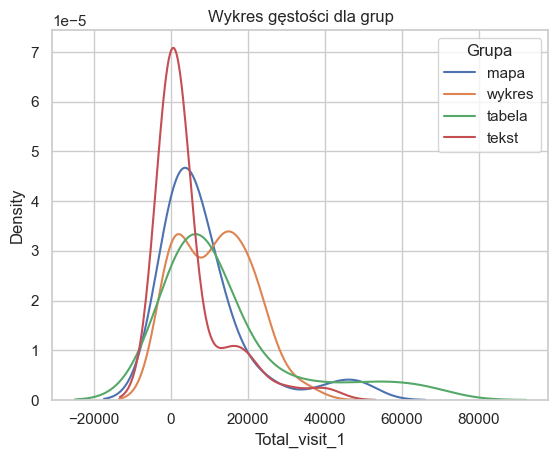

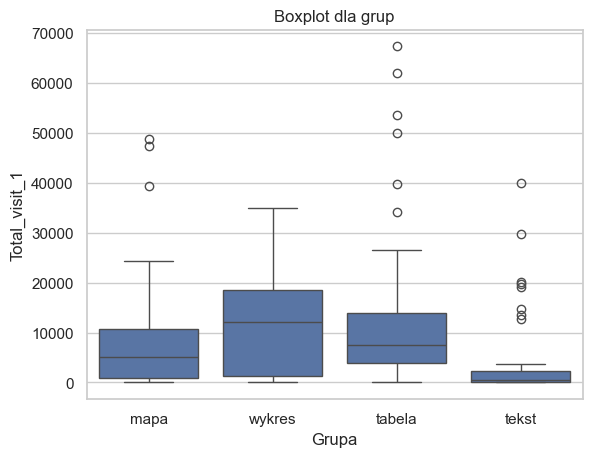

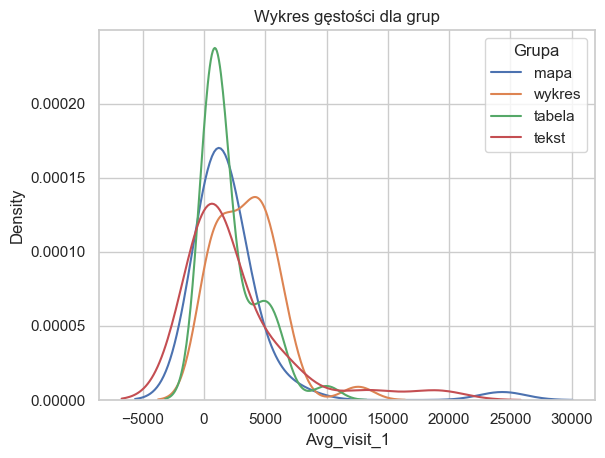

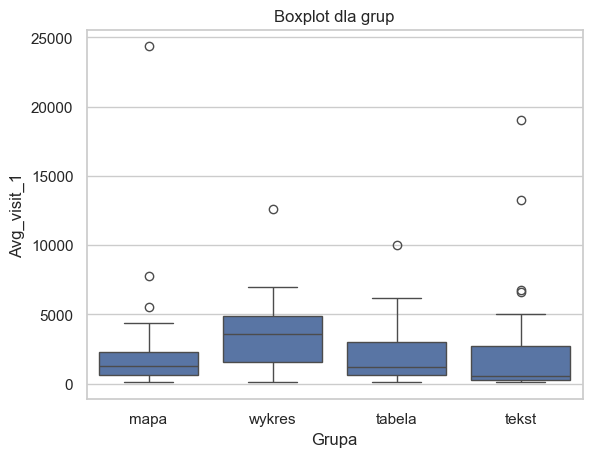

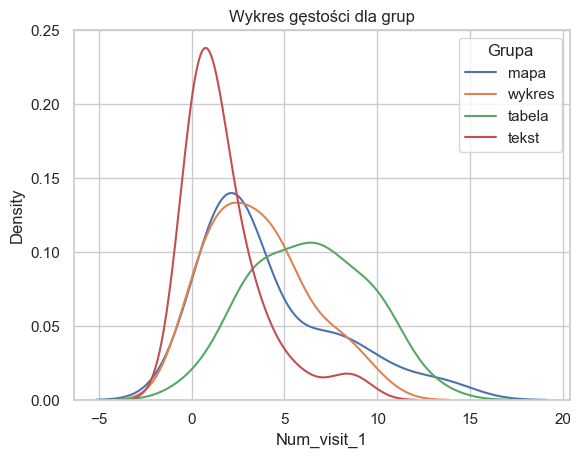

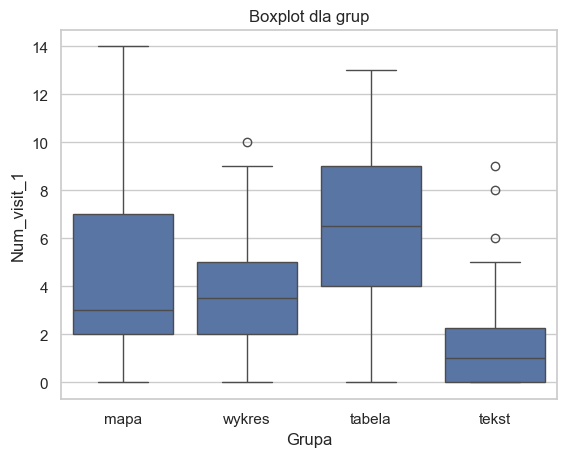

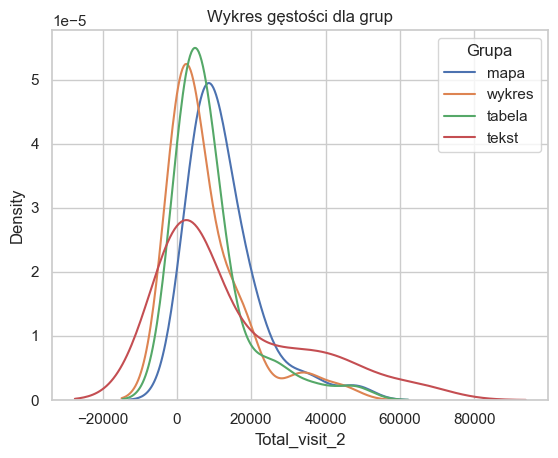

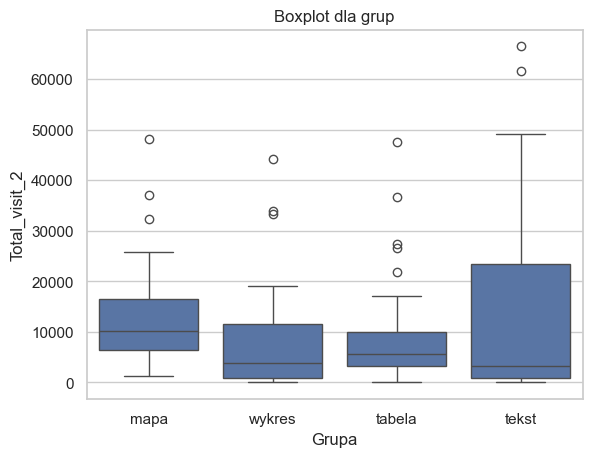

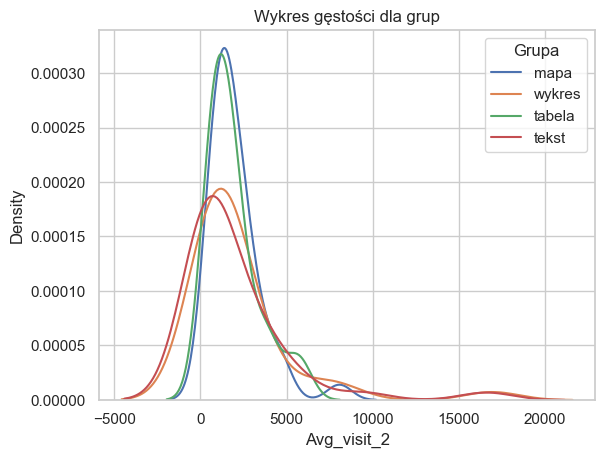

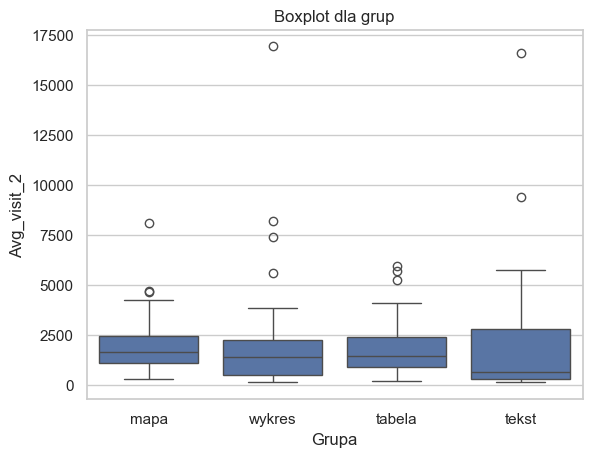

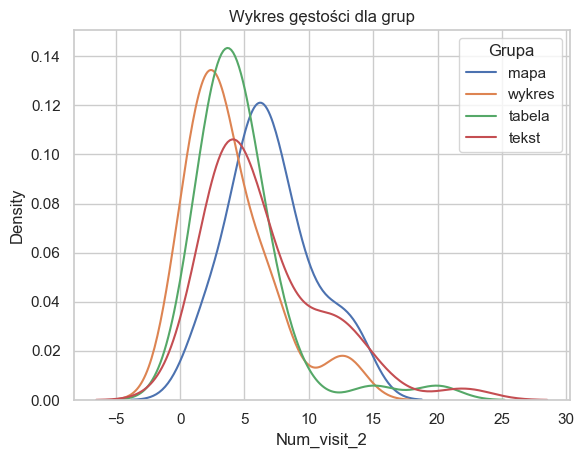

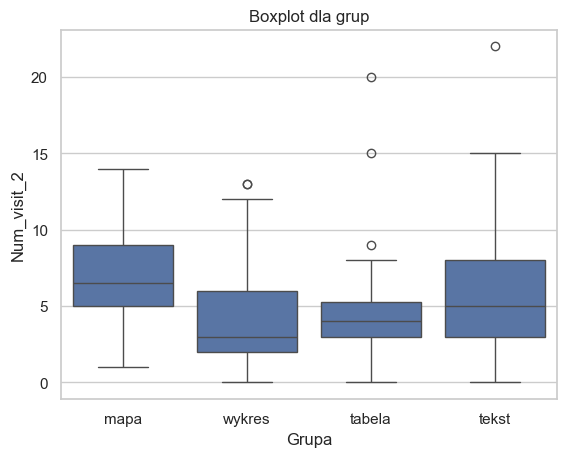

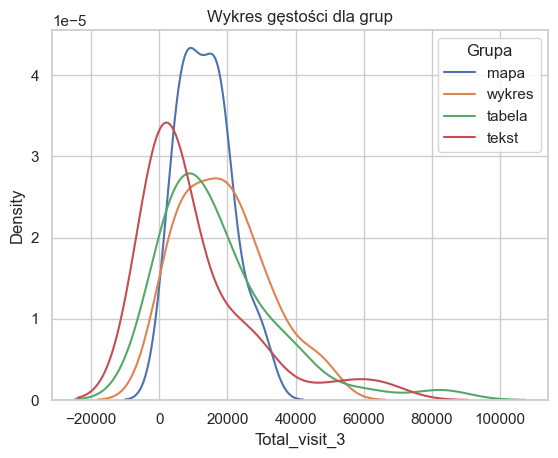

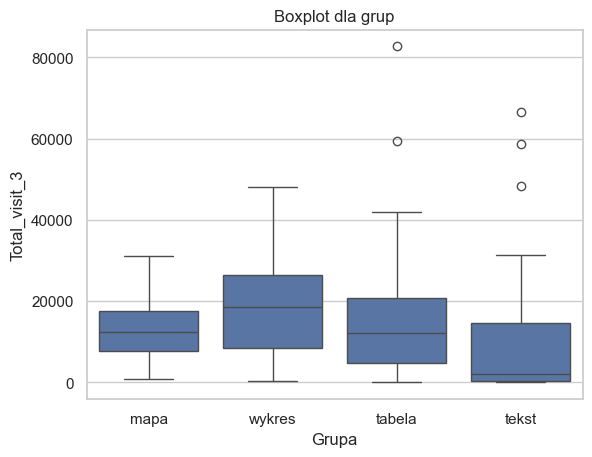

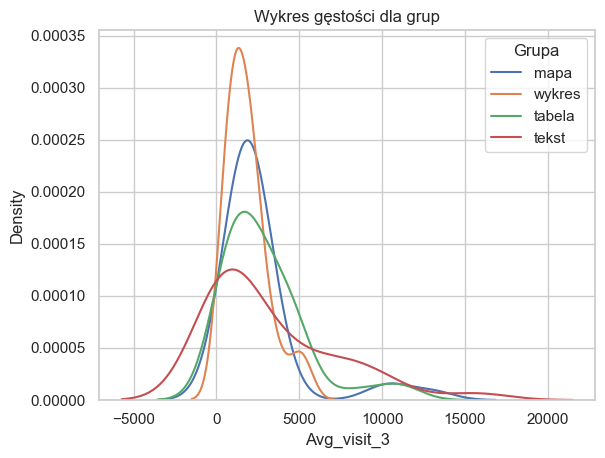

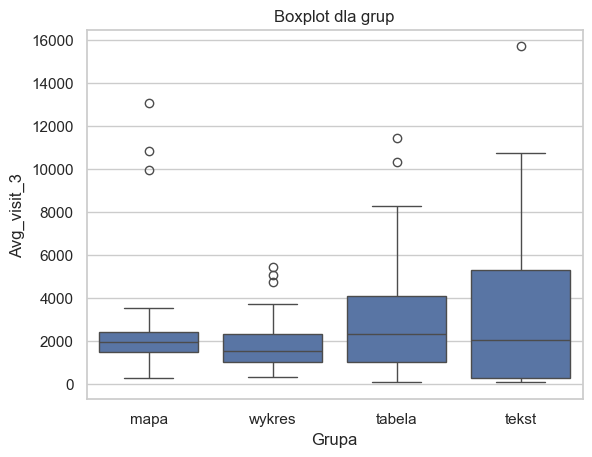

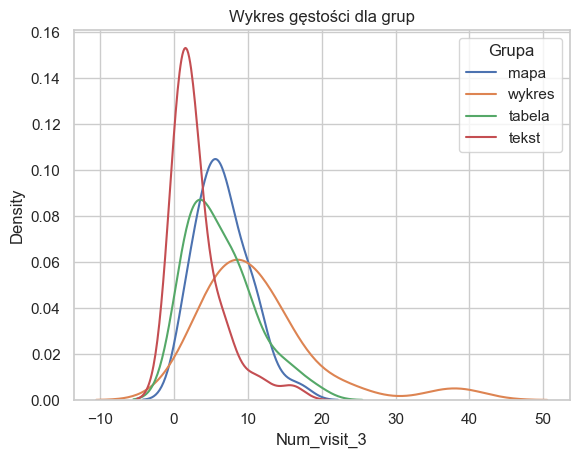

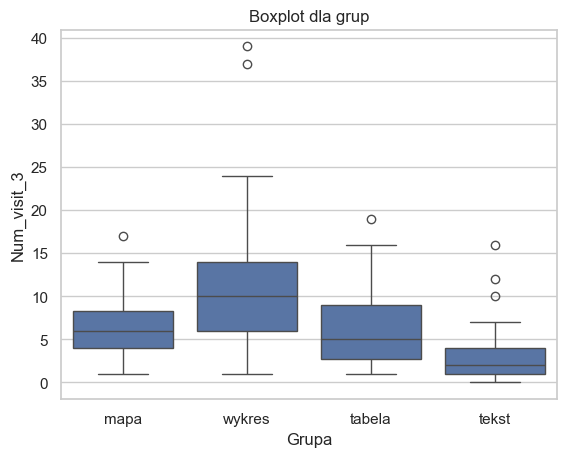

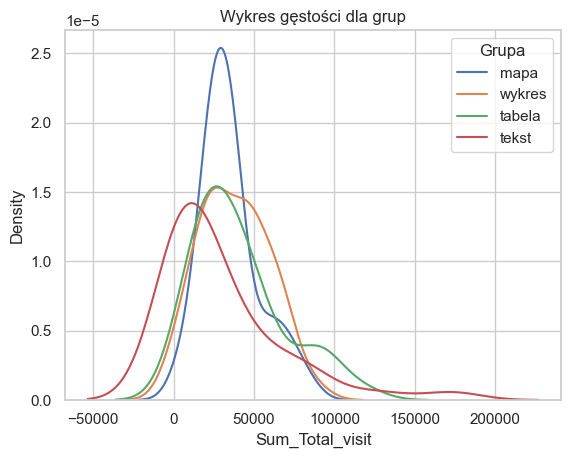

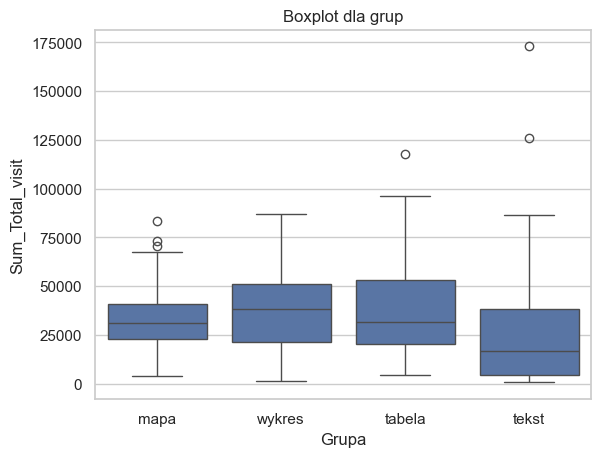

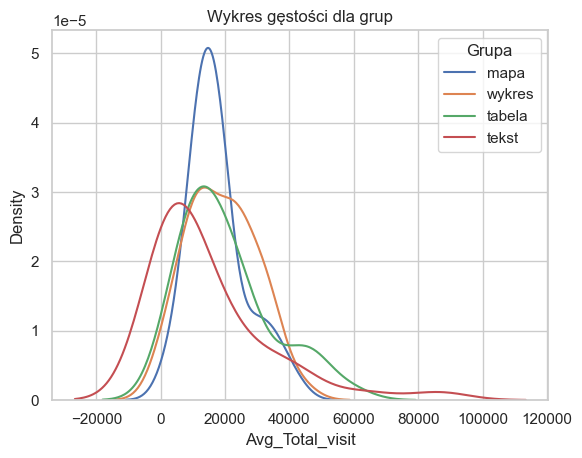

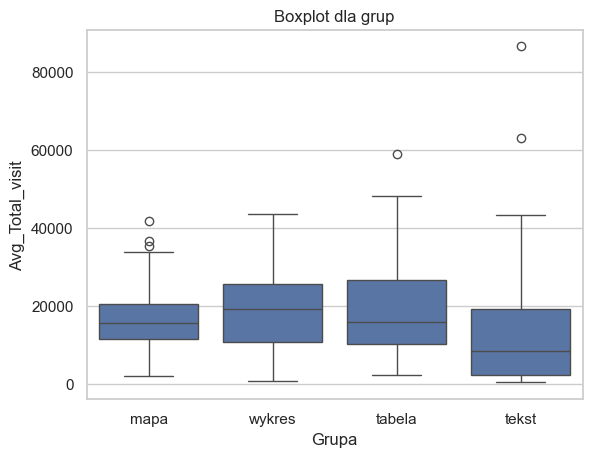

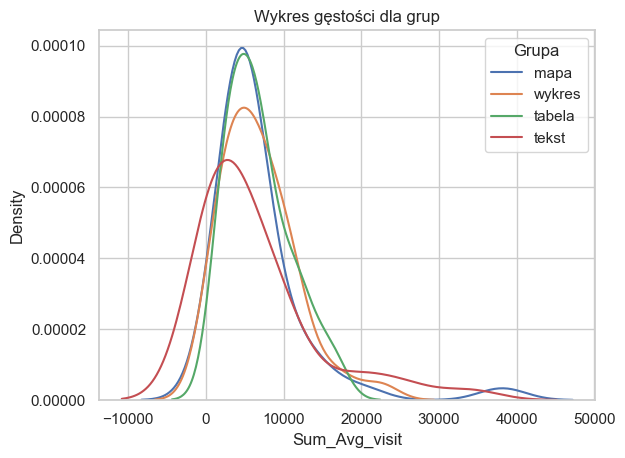

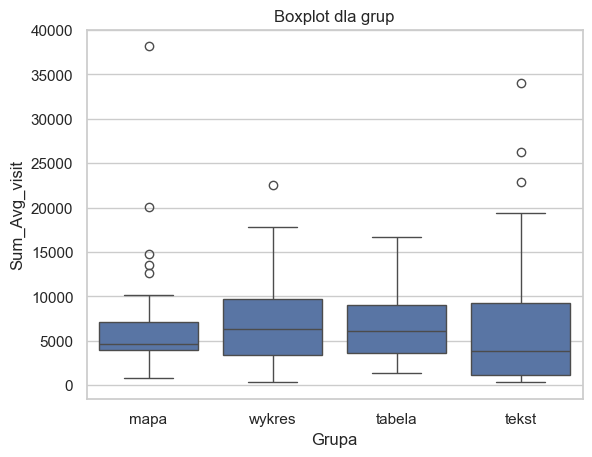

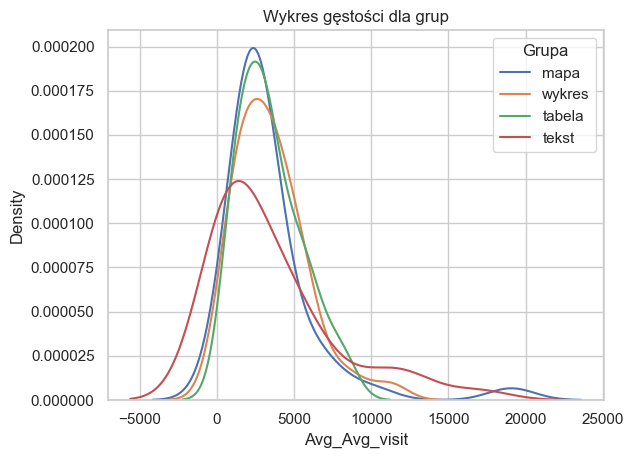

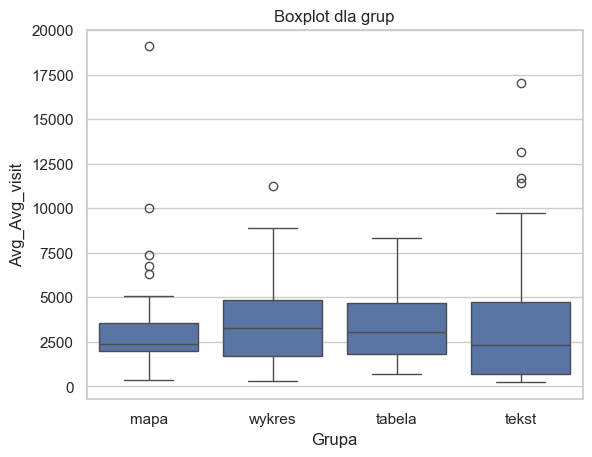

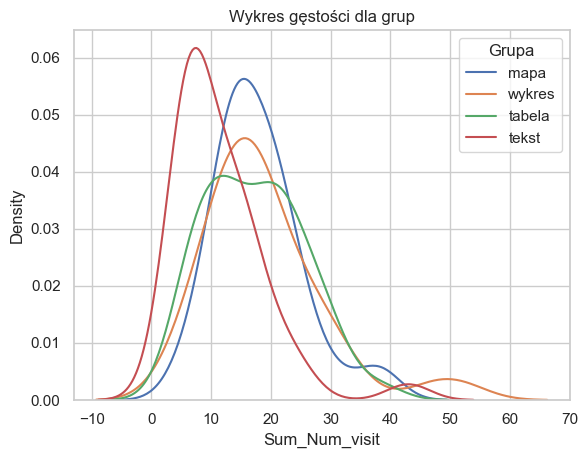

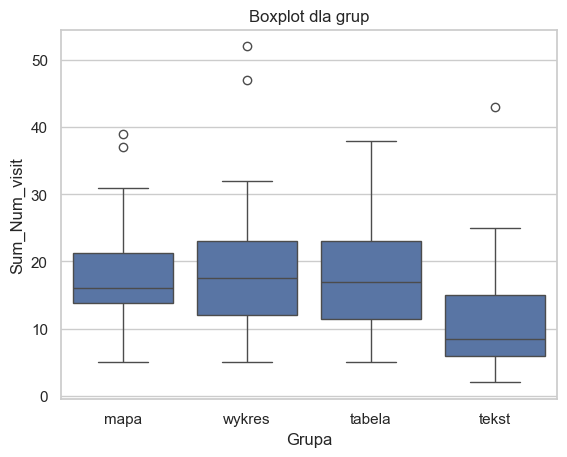

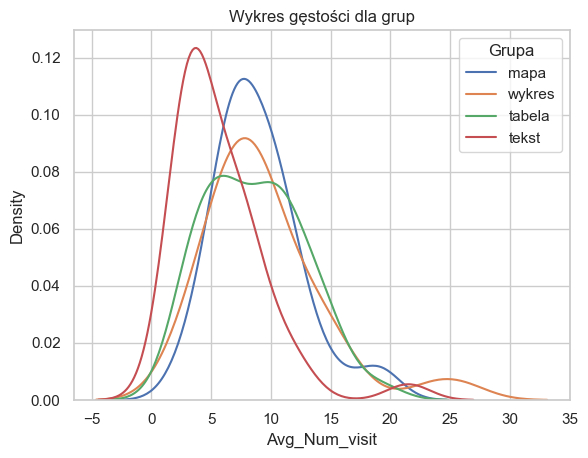

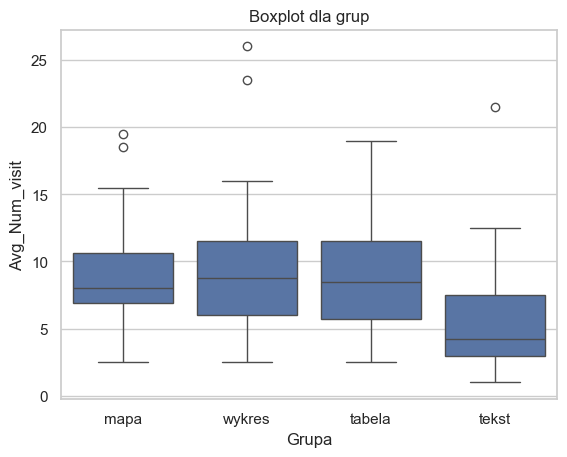

In [13]:
plots(df, visits)

Podsumowanie:

Wizyty: istotne statystycznie: 
- total_visit_1: tabela vs tekst, tekst vs wykres
- num_visit_1: mapa vs tabela, mapa vs tekst, tabela vs tekst, tabela vs wykres, tekst vs wykres
- num_visit_2: mapa vs tabela, mapa vs wykres, tabela vs tekst, tekst vs wykres
- total_visit_3: słabo się różnicuje
- num_visit_3: mapa vs tekst, mapa vs wykres, tabela vs tekst, tabela vs wykres, tekst vs wykres
- Sum_num_visit: mapa vs tekst, tabela vs tekst, tekst vs wykres
- Avg_num_visit: mapa vs tekst, tabela vs tekst, tekst vs wykres